In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from PIL import Image

#to make plots appear inline
%matplotlib inline

In [2]:
# Define the path to our data
DATA_DIR = '../data/'
METADATA_FILE = os.path.join(DATA_DIR, 'styles.csv')

#load
df = pd.read_csv(METADATA_FILE, on_bad_lines='skip')

df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [3]:
print(f"The dataset contains {len(df)} entries.")

# add the full image path to our dataframe
df['image_path'] = df['id'].apply(lambda x: os.path.join(DATA_DIR, 'images', str(x) + '.jpg'))

# Does the file for the first entry actually exist?
first_image_path = df.loc[0, 'image_path']
print(f"Checking for first image: {first_image_path}")
print(f"Does it exist? {os.path.exists(first_image_path)}")

The dataset contains 44424 entries.
Checking for first image: ../data/images\15970.jpg
Does it exist? True


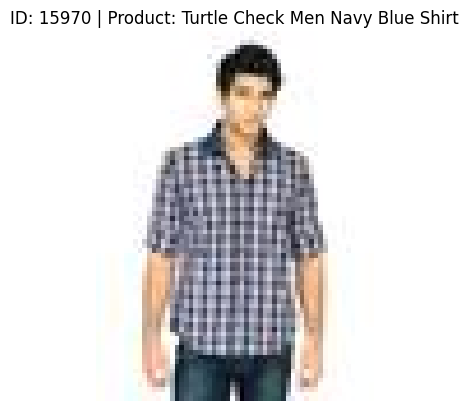

In [4]:
# see what the first image looks like
try:
    image = Image.open(first_image_path)
    plt.imshow(image)
    plt.title(f"ID: {df.loc[0, 'id']} | Product: {df.loc[0, 'productDisplayName']}")
    plt.axis('off') # Hide the axes
    plt.show()
except FileNotFoundError:
    print(f"Error: Image file not found at {first_image_path}")

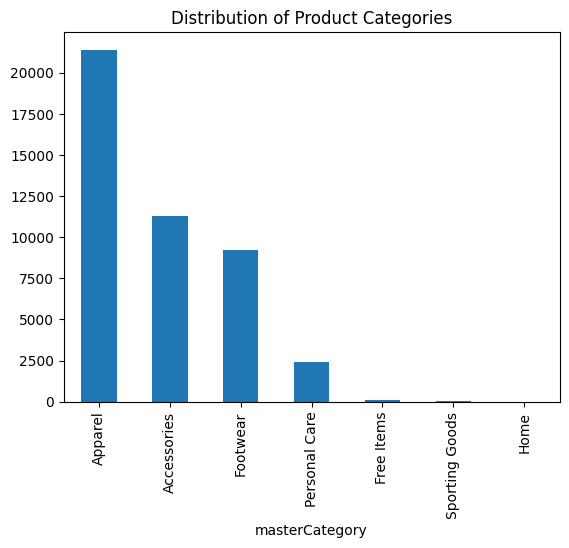

In [5]:
# What are the most common product categories?
df['masterCategory'].value_counts().plot(kind='bar', title='Distribution of Product Categories')
plt.show()